In [940]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
def normalize(features):
    
    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)

        #Vector Subtraction
        feature -= fmean

        #Vector Division
        feature /= frange

    return features

def sigmoid(predictions):
    return (1/(1+np.exp(-predictions)))

def predict(features, weights):
    predictions=np.dot(features, weights)
    
    return predictions

def cost_function(features, targets, weights):
    N = len(targets)

    predictions = predict(features, weights)
    
    predictions = sigmoid(predictions)
    one = np.ones((N,1))
    predictions[predictions == 1] = 0.999

    cost = np.dot(targets.T,np.log(predictions))+np.dot((one-targets).T,np.log(one-predictions)) 
    
    return -1.0/(N) * cost.sum()

def gradient_descent(X, targets, weights, lr):
    
    N = len(X)

    #1 - Get Predictions
    predictions = predict(X, weights)
    predictions = sigmoid(predictions)
    #2 - Calculate error/loss
    error = targets - predictions
    
    
    gradient = np.dot(-X.T,  error)

    #4 Take the average error derivative for each feature
    gradient /= N
    gradient = gradient 
    #5 - Multiply the gradient by our learning rate
    gradient *= lr

    #6 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights 

weights = np.random.rand(8,1)

train = pd.read_csv(r"C:\Users\Saurabh\OneDrive - Manipal Academy of Higher Education\Desktop\MRM-Taskphase\WEEK_2\Week-2-Project\Titanic Dataset\train.csv",index_col=0)
weights

array([[0.107375  ],
       [0.52736806],
       [0.16543786],
       [0.48512201],
       [0.57035936],
       [0.29822659],
       [0.8816294 ],
       [0.26531695]])

In [941]:
arr=np.array([[1],[2],[3]])
x=np.dot(arr.T,arr).flatten()
print(x)

[14]


In [942]:
survived = np.array(train.Survived,dtype=np.float64)
survived.shape=(survived.size,1)

survived


array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [943]:
train['Sex']=train['Sex'].astype("category")
train['Sex']=train['Sex'].cat.reorder_categories(['male','female'], ordered=True)
train['Sex']=train['Sex'].cat.codes
train['Embarked']=train['Embarked'].astype("category")
train['Embarked']=train['Embarked'].cat.reorder_categories(['S','Q','C'], ordered=True)
train['Embarked']=train['Embarked'].cat.codes
#Sex = train.Sex
#dummies=pd.get_dummies(Sex)
#train=train.join(dummies)
#Embarked = train.Embarked
#dummies=pd.get_dummies(Embarked)
#train=train.join(dummies)
#Cabin = train.Cabin
#dummies=pd.get_dummies(Cabin)
#train=train.join(dummies)
train['Age']=train['Age'].fillna(train['Age'].median())
train['Embarked']=train['Embarked'].fillna(train['Embarked'].median())
features = np.array(train.loc[:,["Pclass","SibSp","Parch","Fare","Sex","Embarked","Age"]])
train.Age.head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6     28.0
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [944]:
print(train.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64


In [945]:
features1=normalize(features)
features1

array([[ 0.34567901,  0.05962402, -0.06359895, ..., -0.35241302,
        -0.15375982, -0.09250543],
       [-0.65432099,  0.05962402, -0.06359895, ...,  0.64758698,
         0.51290685,  0.10855011],
       [ 0.34567901, -0.06537598, -0.06359895, ...,  0.64758698,
        -0.15375982, -0.04224155],
       ...,
       [ 0.34567901,  0.05962402,  0.26973438, ...,  0.64758698,
        -0.15375982, -0.01710961],
       [-0.65432099, -0.06537598, -0.06359895, ..., -0.35241302,
         0.51290685, -0.04224155],
       [ 0.34567901, -0.06537598, -0.06359895, ..., -0.35241302,
         0.17957351,  0.03315428]])

In [946]:
bias = np.ones(shape=(len(features1),1))
features1 = np.append(features1,bias, axis=1)
features1

array([[ 0.34567901,  0.05962402, -0.06359895, ..., -0.15375982,
        -0.09250543,  1.        ],
       [-0.65432099,  0.05962402, -0.06359895, ...,  0.51290685,
         0.10855011,  1.        ],
       [ 0.34567901, -0.06537598, -0.06359895, ..., -0.15375982,
        -0.04224155,  1.        ],
       ...,
       [ 0.34567901,  0.05962402,  0.26973438, ..., -0.15375982,
        -0.01710961,  1.        ],
       [-0.65432099, -0.06537598, -0.06359895, ...,  0.51290685,
        -0.04224155,  1.        ],
       [ 0.34567901, -0.06537598, -0.06359895, ...,  0.17957351,
         0.03315428,  1.        ]])

In [947]:
iterations=10000
cost_history=[]
for i in range (iterations):
    cost_history.append(cost_function(features1,survived,weights))
    weights=gradient_descent(features1,survived,weights,0.1)
print(cost_history)
print(weights)

[0.6742074626090115, 0.6697135878071356, 0.6653899239936051, 0.661228957480785, 0.6572234788864135, 0.6533665761214649, 0.6496516268482487, 0.646072290515128, 0.6426225000637552, 0.6392964533947519, 0.6360886046683527, 0.6329936555077069, 0.6300065461643426, 0.627122446697709, 0.6243367482137534, 0.6216450542011223, 0.6190431719977909, 0.6165271044156977, 0.6140930415462474, 0.6117373527653366, 0.6094565789527937, 0.6072474249378015, 0.6051067521789234, 0.6030315716847825, 0.6010190371791879, 0.5990664385125493, 0.5971711953197378, 0.5953308509231123, 0.5935430664782005, 0.5918056153585017, 0.5901163777750192, 0.5884733356254249, 0.5868745675671974, 0.5853182443086196, 0.5838026241111847, 0.5823260484967, 0.5808869381522108, 0.5794837890257517, 0.5781151686058967, 0.5767797123780689, 0.5754761204506281, 0.5742031543438229, 0.5729596339348136, 0.5717444345520999, 0.5705564842128413, 0.5693947609967328, 0.5682582905502738, 0.5671461437154608, 0.5660574342771328, 0.5649913168233995, 0.563

In [960]:
predicted = predict(features1,weights)
predicted = sigmoid(predicted)
predicted=np.array(predicted)
predicted[predicted>=0.5]=1
predicted[predicted<0.5]=0
predicted

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

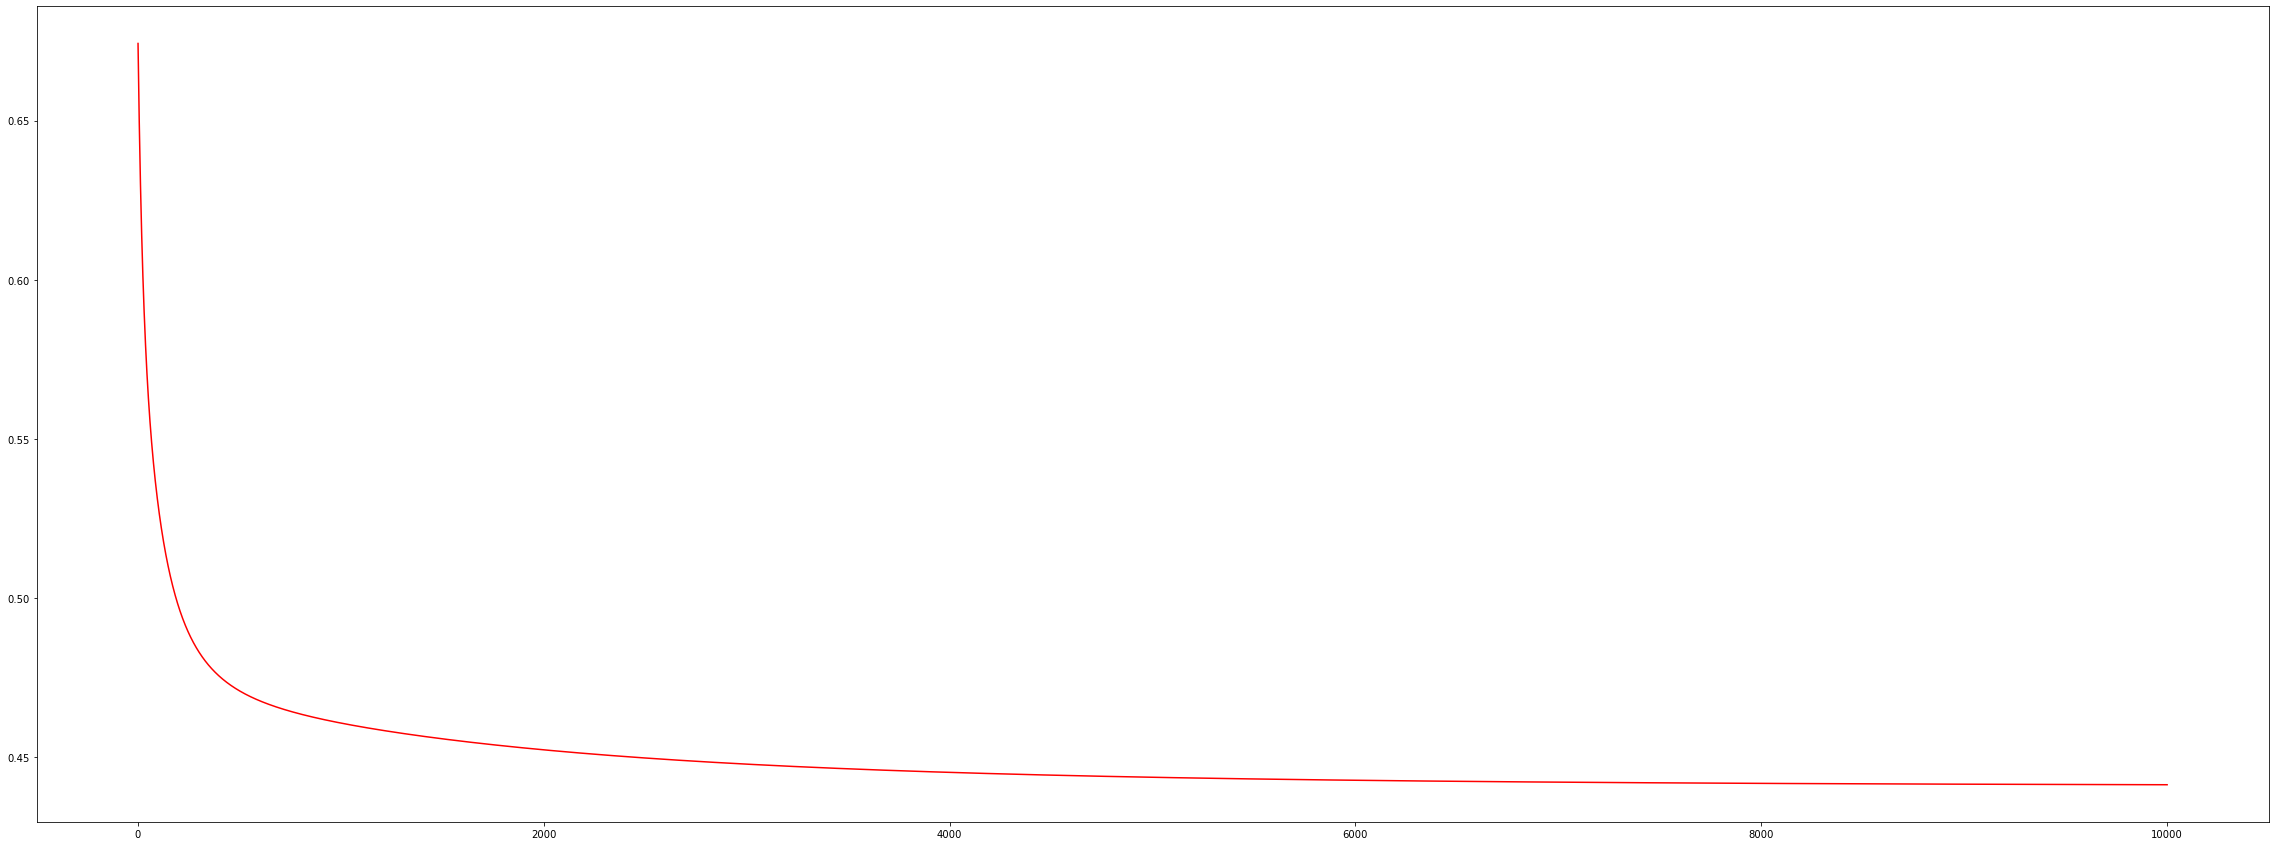

In [949]:
plt.figure(figsize=(40,15))
plt.plot(list(range(1,10001)),cost_history,color='red')

In [962]:
from sklearn.metrics import r2_score
survived_predict = predict(features1, weights)
survived_predict=np.array(survived_predict)
survived_predict = sigmoid(survived_predict)
survived = np.array(train.Survived,dtype=np.float64)
survived.shape=(survived.size,1)
survived_predict[survived_predict>0.5]=1
survived_predict[survived_predict<0.5]=0
accuracy=100 - np.mean(np.abs(survived_predict -survived)) * 100
accuracy

80.13468013468014

In [951]:
test=pd.read_csv(r"C:\Users\Saurabh\OneDrive - Manipal Academy of Higher Education\Desktop\MRM-Taskphase\WEEK_2\Week-2-Project\Titanic Dataset\test.csv",index_col=0)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [952]:
print(test.isnull().sum())

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [953]:
test['Sex']=test['Sex'].astype("category")
test['Sex']=test['Sex'].cat.reorder_categories(['male','female'], ordered=True)
test['Sex']=test['Sex'].cat.codes
test['Embarked']=test['Embarked'].astype("category")
test['Embarked']=test['Embarked'].cat.reorder_categories(['S','Q','C'], ordered=True)
test['Embarked']=test['Embarked'].cat.codes
test['Age']=test['Age'].fillna(test['Age'].median())
test['Embarked']=test['Embarked'].fillna(train['Embarked'].median())
test['Fare']=test['Fare'].fillna(train['Fare'].median())
print(test.isnull().sum())

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64


In [954]:
features = np.array(test.loc[:,["Pclass","SibSp","Parch","Fare","Sex","Embarked","Age"]])
bias = np.ones(shape=(len(features),1))
features = np.append(features,bias, axis=1)


In [955]:
predicted = predict(features,weights)
predicted = sigmoid(predicted)
predicted[predicted>0.5]=1
predicted[predicted<0.5]=0
predicted

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [956]:
for i in predicted :
    if i==1:
        print(i)

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
